# Analyzing Spain Economy (Period: 2000-2008)

Questions: 

·       Was the country in an inflationary
or a recessionary gap in this period?

·       Did unemployment and inflation rates
behave as expected for the type of gap you have identified above?

·       Did the country´s authorities follow
an appropriate fiscal policy in this period?

·       Did the public debt in this period
represent a risk?

·       Did the country´s authorities follow
an appropriate monetary policy in this period?

·       If you were to advise a potential
investor in Spain during the period you have chosen, what would you highlight
as the key risks and opportunities? 


Resources:
- The curse of Unemployment: https://www.imf.org/external/pubs/ft/fandd/basics/unemploy.htm
- What is output gap: https://www.imf.org/external/pubs/ft/fandd/2013/09/basics.htm

In [1]:
!which python

/Users/eshaankirpal/miniforge3/envs/financials/bin/python


In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import widgets

## Read the Data

In [3]:
DATAPATH='../assets'
FILENAME='spain-oecd-stats.csv'

In [7]:
df_spain=pd.read_csv(os.path.join(DATAPATH,FILENAME))#,sheet_name=PERIOD_SHEET_MAP[PERIOD],skiprows=5,usecols=[*range(2,22)])
#df_spain.rename({'Unnamed: 2':'Date'},axis=1,inplace=True)
#df_spain.set_index('Date', inplace=True)
print(df_spain.shape)
df_spain.head()

(81, 17)


,LOCATION,Country,VARIABLE,Variable,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,ESP,Spain,GAP,Output gap as a percentage of potential GDP,A,Annual,2000,2000,PC,Percentage,0,Units,NaN,NaN,1.596304,NaN,NaN
1,ESP,Spain,GAP,Output gap as a percentage of potential GDP,A,Annual,2001,2001,PC,Percentage,0,Units,NaN,NaN,2.552591,NaN,NaN
2,ESP,Spain,GAP,Output gap as a percentage of potential GDP,A,Annual,2002,2002,PC,Percentage,0,Units,NaN,NaN,2.308193,NaN,NaN
3,ESP,Spain,GAP,Output gap as a percentage of potential GDP,A,Annual,2003,2003,PC,Percentage,0,Units,NaN,NaN,2.248744,NaN,NaN
4,ESP,Spain,GAP,Output gap as a percentage of potential GDP,A,Annual,2004,2004,PC,Percentage,0,Units,NaN,NaN,2.119307,NaN,NaN


## Data Exploration

In [5]:
df_spain.describe()

,TIME,Time,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,81.000000,81.000000,81.0,27.0,27.0,81.000000,0.0,0.0
mean,2004.000000,2004.000000,0.0,2010.0,2010.0,8.145939,NaN,NaN
std,2.598076,2.598076,0.0,0.0,0.0,13.914780,NaN,NaN
min,2000.000000,2000.000000,0.0,2010.0,2010.0,-4.420525,NaN,NaN
25%,2002.000000,2002.000000,0.0,2010.0,2010.0,2.248744,NaN,NaN
50%,2004.000000,2004.000000,0.0,2010.0,2010.0,3.053744,NaN,NaN
75%,2006.000000,2006.000000,0.0,2010.0,2010.0,4.391767,NaN,NaN
max,2008.000000,2008.000000,0.0,2010.0,2010.0,57.958530,NaN,NaN


In [14]:
df_spain['VARIABLE'].value_counts()

VARIABLE
GAP              9
NLGQ             9
GGFLMQ           9
GNINTQ           9
GDPV_ANNPCT      9
PCOREH_YTYPCT    9
CPIH_YTYPCT      9
UNR              9
IRS              9
Name: count, dtype: int64

In [20]:
variable=df_spain['Variable'].unique().tolist()
var_short=df_spain['VARIABLE'].unique().tolist()
variable

['Output gap as a percentage of potential GDP',
 'General government net lending as a percentage of GDP',
 'Gross public debt, Maastricht criterion as a percentage of GDP',
 'Net general government interest payments as a percentage of GDP',
 'Gross domestic product, volume, growth',
 'Harmonised core inflation',
 'Harmonised headline inflation',
 'Unemployment rate',
 'Short-term interest rate']

In [12]:
cols_to_keep=['Country','VARIABLE','Variable','Time','Value']
df_spain=df_spain[cols_to_keep]
df_spain.tail()

,Country,VARIABLE,Variable,Time,Value
76,Spain,IRS,Short-term interest rate,2004,2.106333
77,Spain,IRS,Short-term interest rate,2005,2.184683
78,Spain,IRS,Short-term interest rate,2006,3.079225
79,Spain,IRS,Short-term interest rate,2007,4.277608
80,Spain,IRS,Short-term interest rate,2008,4.634233


## Data Exploration

#### Headline vs Core Inflation

1. Headline inflation refers to the change in value of all goods in the basket.

2. Core inflation excludes food and fuel items from headline inflation.

3. Since the prices of fuel and food items tend to fluctuate and create ‘noise’ in inflation computation, core inflation is less volatile than headline inflation.

4. In a developed economy, food & fuel account for 10-15% of the household con .. 

Read more at:
https://economictimes.indiatimes.com/wealth/save/what-are-headline-and-core-inflation/articleshow/80071229.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

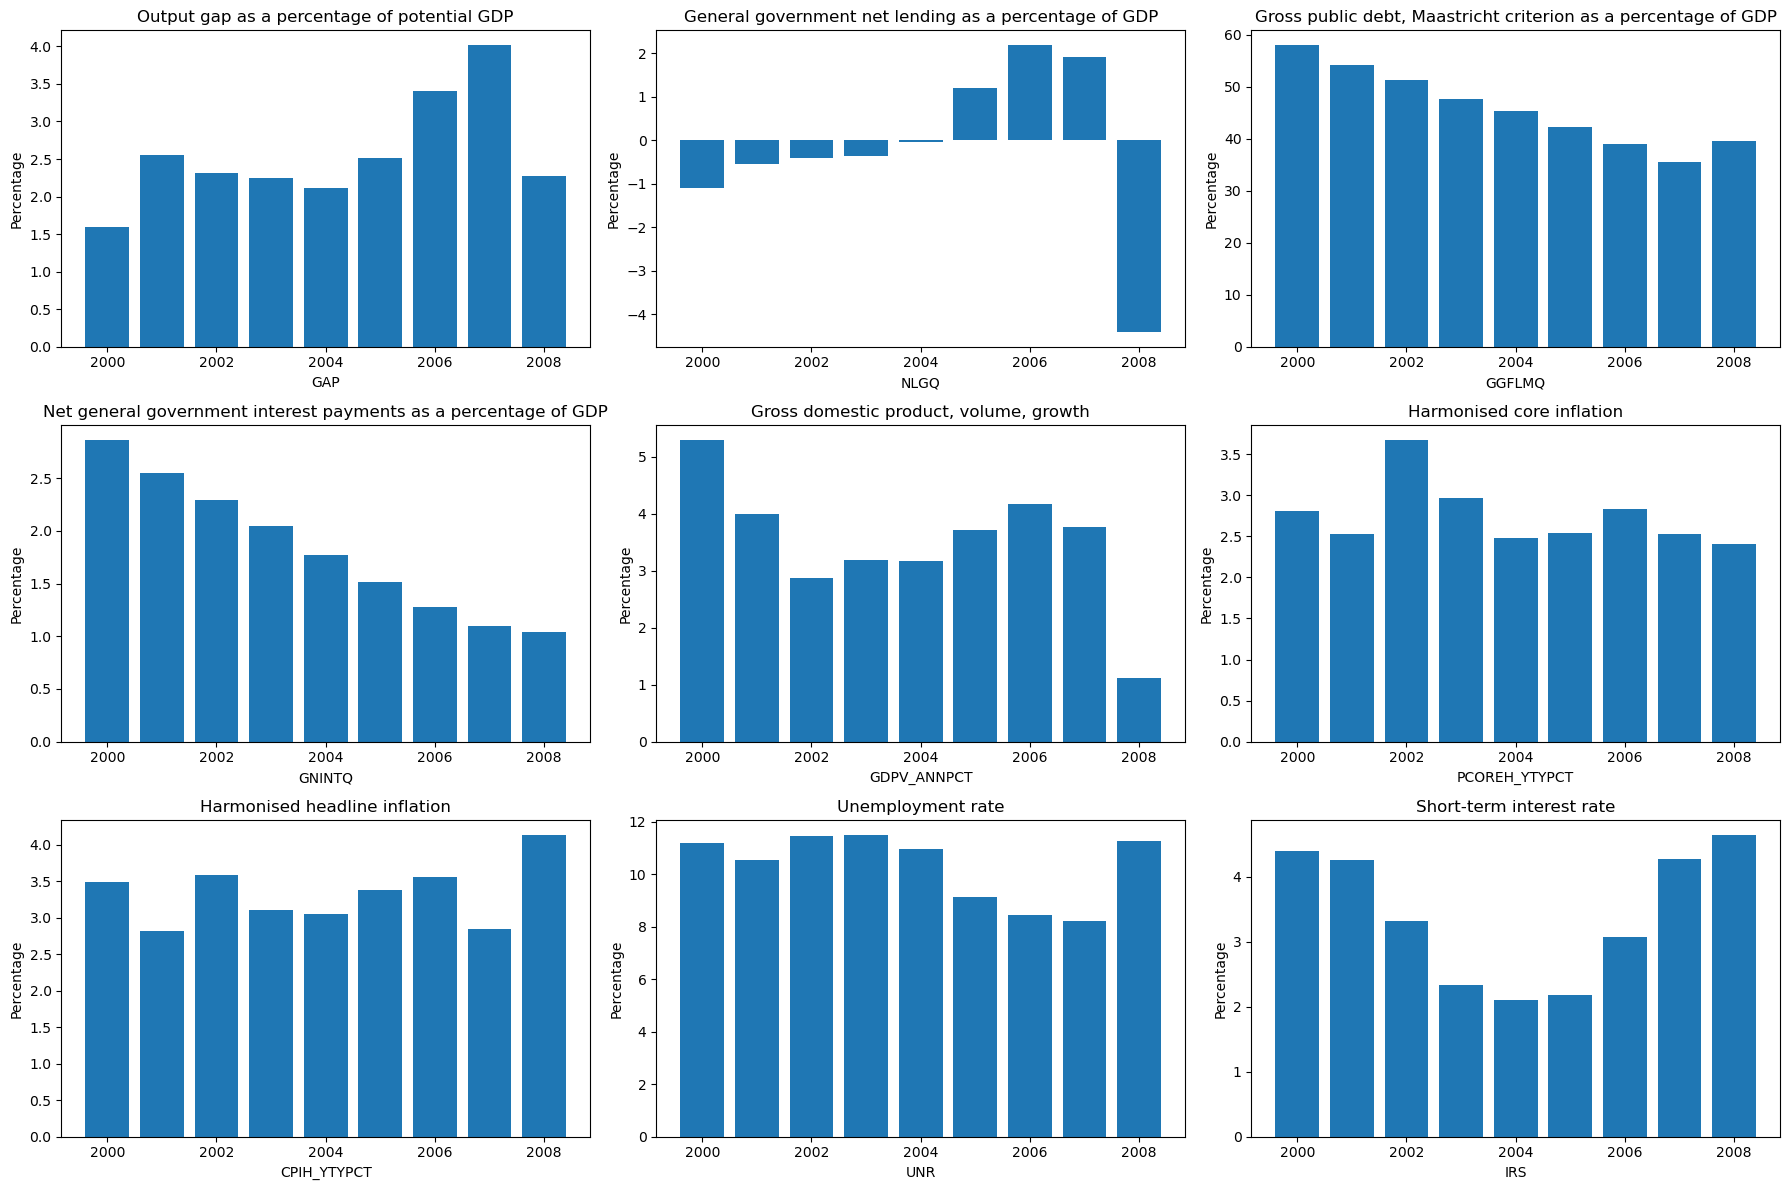

In [29]:
f,a = plt.subplots(3,3,figsize=(18,12))
a = a.ravel()

for idx,ax in enumerate(a):
    var=variable[idx]
    df_tmp=df_spain[df_spain['Variable']==var]
    ax.bar(df_tmp['Time'],df_tmp['Value'])
    ax.set_title(var)
    ax.set_xlabel(var_short[idx])
    ax.set_ylabel('Percentage')
plt.tight_layout()

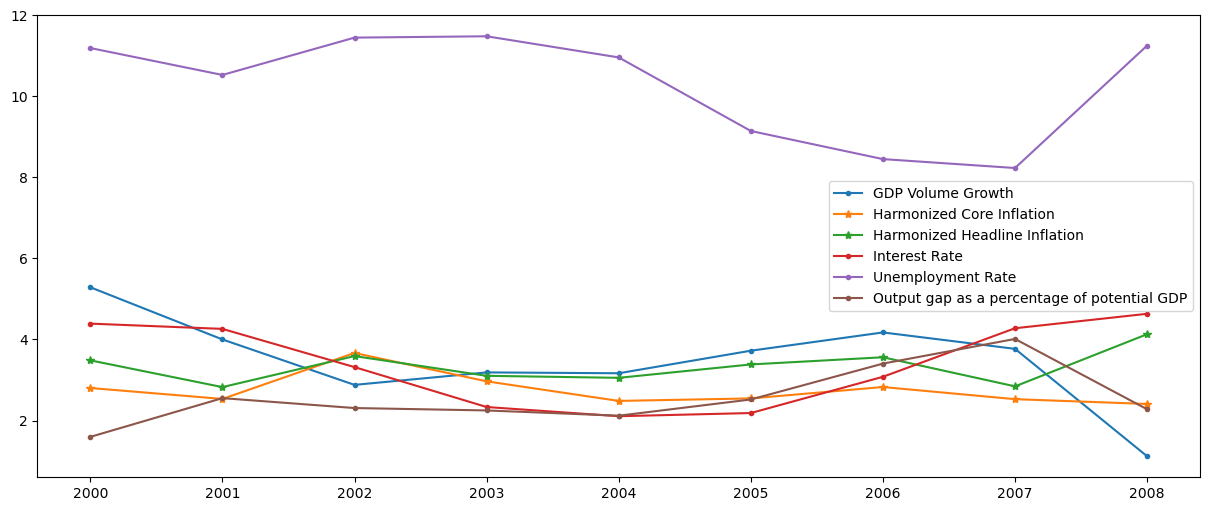

In [57]:
plt.figure(figsize=(15,6))
var='GDPV_ANNPCT'
df_tmp=df_spain[df_spain['VARIABLE']==var]
plt.plot(df_tmp['Time'],df_tmp['Value'],'.-',label='GDP Volume Growth')

var='PCOREH_YTYPCT'
df_tmp=df_spain[df_spain['VARIABLE']==var]
plt.plot(df_tmp['Time'],df_tmp['Value'],'*-',label='Harmonized Core Inflation')

var='CPIH_YTYPCT'
df_tmp=df_spain[df_spain['VARIABLE']==var]
plt.plot(df_tmp['Time'],df_tmp['Value'],'*-',label='Harmonized Headline Inflation')

var='IRS'
df_tmp=df_spain[df_spain['VARIABLE']==var]
plt.plot(df_tmp['Time'],df_tmp['Value'],'.-',label='Interest Rate')

var='UNR'
df_tmp=df_spain[df_spain['VARIABLE']==var]
plt.plot(df_tmp['Time'],df_tmp['Value'],'.-',label='Unemployment Rate')

var='GAP'
df_tmp=df_spain[df_spain['VARIABLE']==var]
plt.plot(df_tmp['Time'],df_tmp['Value'],'.-',label='Output gap as a percentage of potential GDP')

plt.legend(loc='best')
plt.show()

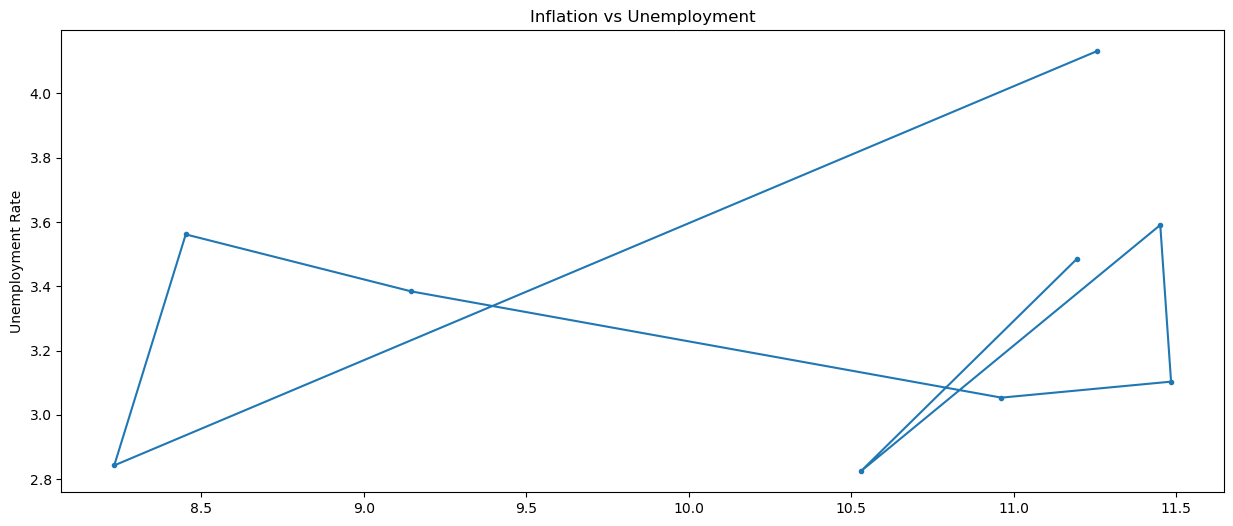

In [71]:
plt.figure(figsize=(15,6))
var='CPIH_YTYPCT'
df_tmp1=df_spain[df_spain['VARIABLE']==var]

var='UNR'
df_tmp2=df_spain[df_spain['VARIABLE']==var]
plt.plot(df_tmp2['Value'],df_tmp1['Value'],'.-')

plt.ylabel('Harmonized Headline Inflation')
plt.ylabel('Unemployment Rate')
plt.title("Inflation vs Unemployment")
plt.show()

In [69]:
df_tmp1

,Country,VARIABLE,Variable,Time,Value
54,Spain,CPIH_YTYPCT,Harmonised headline inflation,2000,3.485105
55,Spain,CPIH_YTYPCT,Harmonised headline inflation,2001,2.824779
56,Spain,CPIH_YTYPCT,Harmonised headline inflation,2002,3.590450
57,Spain,CPIH_YTYPCT,Harmonised headline inflation,2003,3.103475
58,Spain,CPIH_YTYPCT,Harmonised headline inflation,2004,3.053744
59,Spain,CPIH_YTYPCT,Harmonised headline inflation,2005,3.384065
60,Spain,CPIH_YTYPCT,Harmonised headline inflation,2006,3.561321
61,Spain,CPIH_YTYPCT,Harmonised headline inflation,2007,2.843016
62,Spain,CPIH_YTYPCT,Harmonised headline inflation,2008,4.130672


In [70]:
df_tmp2

,Country,VARIABLE,Variable,Time,Value
63,Spain,UNR,Unemployment rate,2000,11.193666
64,Spain,UNR,Unemployment rate,2001,10.529022
65,Spain,UNR,Unemployment rate,2002,11.450341
66,Spain,UNR,Unemployment rate,2003,11.483568
67,Spain,UNR,Unemployment rate,2004,10.961669
68,Spain,UNR,Unemployment rate,2005,9.146167
69,Spain,UNR,Unemployment rate,2006,8.452145
70,Spain,UNR,Unemployment rate,2007,8.232158
71,Spain,UNR,Unemployment rate,2008,11.254543


In [56]:
var='CPIH_YTYPCT'
df_tmp=df_spain[df_spain['VARIABLE']==var]
df_tmp.Value.mean()

3.330736298199577

Observations:

GDP=C+G+I+(X-M)

During 2000-08, Spain was in an inflationary gap period with an average GDP growth rate of 3.4% and a standard deviation of 1%. Inflation was steady at about 3.3%. Unemployment was at an average of 10%. Their gross public debt and interest payments were on a decline. This overall was a good economic period.

1. Gross Public debt as a % of GDP of Spain from 2000-08 was huge, at an average of 45%. Good thing is that the government was taking steps to reduce the percent which explains the downward trend, except in 2008 where it increased slightly. This overall was not a big threat to the economy as the country was having a steady GDP growth, inflation was steady, and 

2. Consequentially the net general interest payments as a % of GDP was also declining as the public debt was reducing. It reduced from 3% approx to 1% in the period.

3. Spain was a borrowing nation until 2004, though as the GDP growth rate increased during the 2002-2007 period, it turned a corner and became a lending nation. Though in the face of the financial crisis of 2008 it borrowed again. 

4. Short-term Interest rate was oscillating b/w 4% and 2% over this period. After near 2% interest rates from 2003-05, its effects are observed in the subsequent years: Spain's output gap has improved, reduced unemployment rate, began lending, and GDP growth rate increased.

5. Despite a positive output gap, Spain had average unemplyment of 10%. This suggests that despite Spain performing better than potential GDP, it's producers are concentrated.   

Inflation was mostly steady b/w 3-3.5 during the 2000-07 period. Spain used an expansive monetary policy in most of the 2000-2006 and shifted to restrictive policy 2007 onwards.

Key Risks:
- The country might not be taking enough risks, and instead is busy reducing its public debt. 

Opportunities:

- Stable economy with good overall metrics over the last 8 years.
- Possibility to obtain cheap labour, with 10% workforce available for work.
- Spain has good options for borrowing for new projects, as public debt is on decline. Spain had also been lending cash abroad. Interest rates are low and fluctuate b/w 2-4%.
- 


### Questions and Answers:
- Was the country in an inflationary or a recessionary gap in this period?
Spain was in an inflationary gap period with an average GDP growth rate of 3.4% and a standard deviation of 1%.

- Did unemployment and inflation rates behave as expected for the type of gap you have identified above?
Yes, unemployment was expectedly decreasing in the inflationary period, and inflation rates were steady at about 3.3%. Unemployment was at an average of 10%.

- Did the country's authorities follow an appropriate fiscal policy in this period?
Yes, Spain kept Interest rates low to fuel aggregate demand, which improved the country's GDP, output gap, and reduced the unemployment rate while keeping a stable inflation of 3.3% over this period.

- Did the public debt in this period represent a risk?
No, it was under 60% of the GDP, complying the Maastricht criterion. And also it came down almost 20% in this period with the interest payments also coming down.

- Did the country´s authorities follow an appropriate monetary policy in this period?
Monetary policy is expansive. Short-term Interest rate was oscillating b/w 4% and 2% over this period. After near 2% interest rates from 2003-05, its effects are observed in the subsequent years: Spain's output gap had widened, reduced unemployment rate, it began lending as a nation, and its GDP growth rate increased.

- If you were to advise a potential investor in Spain during the period you have chosen, what would you highlight
as the key risks and opportunities?

Key Risks:
    - High inflation
    - Unemployment is high
    
Opportunities:
    - Stable economy with good overall metrics over the last 8 years.
    - Possibility to obtain cheap labour, with 10% workforce available for work.
    - Spain has good options for borrowing for new projects, as public debt is on decline. Spain had also been lending cash abroad. Interest rates are low and fluctuate b/w 2-4%.

## Course 2 Assignment 

In this peer graded you will have to analize Spain for the period 2004-2018.

The next step after studying all the information, is to devide the information in two periods:

- 2004-2012
- 2013-2018

Now, taking this in consideration, you will have to answer the following questions:

1- Compare investment and savings (expressed as a percent of GDP).

2- Compare your predictions with the current account balance figures you have downloaded for these two periods.

3- What are the differences in the risk profile of Spain between these two periods?

4- Spain during this period had exchanged its own currency for the euro. If instead it had had its own currency, and all other things remaining equal, what might the trends in the currency´s value have been in the 2004-2012 period? In the 2013-2018 period?

5- If the government had wanted to return the country´s current account to balance, what would have been the right policies for it to follow in 2004-2012? In 2013-2018?

6- Has anything changed in Spain´s balance of payments profile since 2018?

Grading Criteria Overview


In [4]:
FILENAME='WEO_Data.xlsx'

In [5]:
df_spain=pd.read_excel(os.path.join(DATAPATH,FILENAME),engine='openpyxl')
#df_spain.rename({'Unnamed: 2':'Date'},axis=1,inplace=True)
#df_spain.set_index('Date', inplace=True)
print(df_spain.shape)
df_spain.head()

(3, 31)


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2004,2005,2006,2007,2008,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
0,Spain,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,28.285,29.387,30.565,30.442,28.455,...,20.470,21.590,21.481,20.722,20.900,21.373,21.362,21.253,21.170,2022
1,Spain,Gross national savings,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,22.803,22.133,21.714,21.010,19.551,...,21.087,22.351,22.093,22.817,22.910,23.267,23.283,23.134,23.001,2022
2,Spain,Current account balance,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-5.482,-7.254,-8.851,-9.432,-8.903,...,0.618,0.761,0.612,2.095,2.011,1.893,1.920,1.881,1.831,2022


In [6]:
cols_to_keep=['Subject Descriptor',2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,
 2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028]
df_spain=df_spain[cols_to_keep]
df_spain

,Subject Descriptor,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Total investment,28.285,29.387,30.565,30.442,28.455,23.303,22.303,20.572,18.436,...,20.829,20.470,21.590,21.481,20.722,20.900,21.373,21.362,21.253,21.170
1,Gross national savings,22.803,22.133,21.714,21.010,19.551,19.215,18.648,17.848,18.522,...,22.936,21.087,22.351,22.093,22.817,22.910,23.267,23.283,23.134,23.001
2,Current account balance,-5.482,-7.254,-8.851,-9.432,-8.903,-4.088,-3.656,-2.724,0.086,...,2.106,0.618,0.761,0.612,2.095,2.011,1.893,1.920,1.881,1.831


In [7]:
df_spain=df_spain.rename({'Subject Descriptor':''},axis=1)
df_spain=df_spain.set_index('')
df_spain

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
,,,,,,,,,,,,,,,,,,,,,
Total investment,28.285,29.387,30.565,30.442,28.455,23.303,22.303,20.572,18.436,17.210,...,20.829,20.470,21.590,21.481,20.722,20.900,21.373,21.362,21.253,21.170
Gross national savings,22.803,22.133,21.714,21.010,19.551,19.215,18.648,17.848,18.522,19.248,...,22.936,21.087,22.351,22.093,22.817,22.910,23.267,23.283,23.134,23.001
Current account balance,-5.482,-7.254,-8.851,-9.432,-8.903,-4.088,-3.656,-2.724,0.086,2.038,...,2.106,0.618,0.761,0.612,2.095,2.011,1.893,1.920,1.881,1.831


In [8]:
df_spain=df_spain.T.reset_index()
df_spain=df_spain.rename({'index':'Year'},axis=1)
df_spain

,Year,Total investment,Gross national savings,Current account balance
0,2004,28.285,22.803,-5.482
1,2005,29.387,22.133,-7.254
2,2006,30.565,21.714,-8.851
3,2007,30.442,21.010,-9.432
4,2008,28.455,19.551,-8.903
5,2009,23.303,19.215,-4.088
6,2010,22.303,18.648,-3.656
7,2011,20.572,17.848,-2.724
8,2012,18.436,18.522,0.086
9,2013,17.210,19.248,2.038


In [23]:
df_spain['Current Account Balance-Predictions']=df_spain['Gross national savings']-df_spain['Total investment']
df_spain.head()

,Year,Total investment,Gross national savings,Current account balance,Current Account Balance-Predictions
0,2004,28.285,22.803,-5.482,-5.482
1,2005,29.387,22.133,-7.254,-7.254
2,2006,30.565,21.714,-8.851,-8.851
3,2007,30.442,21.010,-9.432,-9.432
4,2008,28.455,19.551,-8.903,-8.904


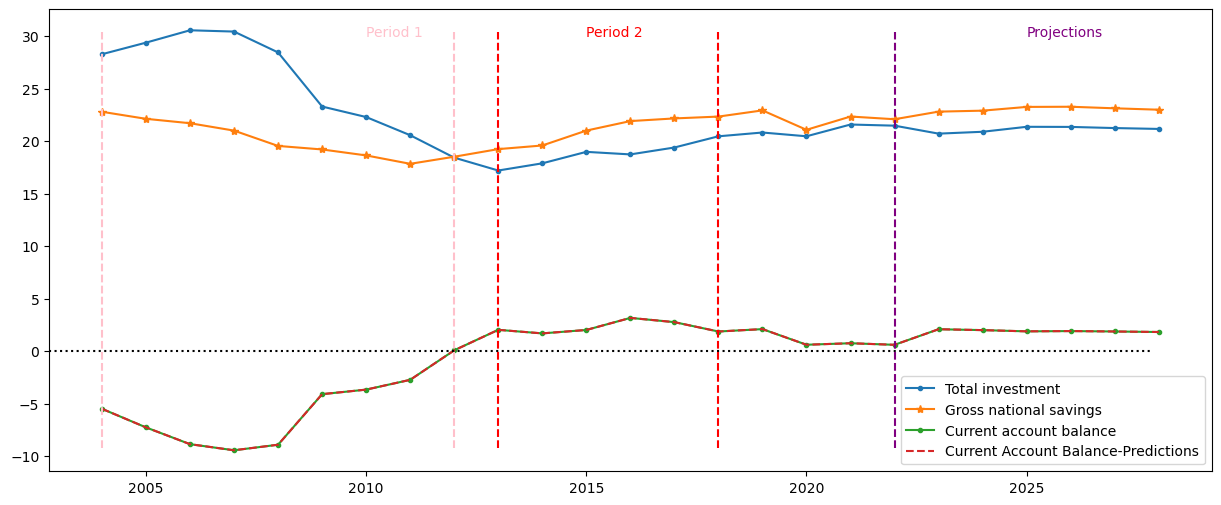

In [28]:
plt.figure(figsize=(15,6))
var='Total investment'
plt.plot(df_spain['Year'],df_spain[var],'.-',label=var)

var='Gross national savings'
plt.plot(df_spain['Year'],df_spain[var],'*-',label=var)

var='Current account balance'
plt.plot(df_spain['Year'],df_spain[var],'.-',label=var)

var='Current Account Balance-Predictions'
plt.plot(df_spain['Year'],df_spain[var],'--',label=var)

plt.axhline(y = 0, xmin = 0, xmax = 0.95, color = 'black', drawstyle='steps',linestyle='dotted')
plt.axvline(x = 2004, ymin = 0.05, ymax = 0.95, color = 'pink', drawstyle='steps',linestyle='dashed')
plt.axvline(x = 2012, ymin = 0.05, ymax = 0.95, color = 'pink', drawstyle='steps',linestyle='dashed')
plt.axvline(x = 2013, ymin = 0.05, ymax = 0.95, color = 'red', drawstyle='steps',linestyle='dashed')
plt.axvline(x = 2018, ymin = 0.05, ymax = 0.95, color = 'red', drawstyle='steps',linestyle='dashed')
plt.axvline(x = 2022, ymin = 0.05, ymax = 0.95, color = 'purple', drawstyle='steps',linestyle='dashed')

plt.annotate('Period 1',xy=(2010,30),color='pink')
plt.annotate('Period 2',xy=(2015,30),color='red')
plt.annotate('Projections',xy=(2025,30),color='purple')

plt.legend(loc='lower right')
plt.show()

Total Investment - About 20% of the GDP being invested

Gross National Savings - Over 20% of the GDP is being saved annually. A 

Current Account Balance - Moved from -ve to +ve in 2013 and stayed just above zero throughout. Seems like lowering of the total investments until 2013 were done to make Spain fiscal surplus from being deficit. Atleast the two plot lines seem to show an inverse relationship.

Questions: 

1- Compare investment and savings (expressed as a percent of GDP).

Ans: In the first period, Spain government invested more than they saved. For most parts of this period, they saved about 20% of their GDP while they invested over 25% . This should have put them in a fiscal deficit of about 5-10%. While in the second period, they were conservative, i.e., they saved more than they invested and they should have been  in a fiscal surplus.

2- Compare your predictions with the current account balance figures you have downloaded for these two periods.

Ans: Yes, my predictions for the current account balance match exactly with the provided current account balance. It matches because I used the  formula for current account balance, i.e., savings minus investments. 

3- What are the differences in the risk profile of Spain between these two periods?

Ans: Spain government were in a current account deficit in period 1, as they were spending more than they were saving. They borrowed internationally and this was a risk. They were also at risk of currency being devalued.
While in the second period, they were current account surplus. This increased risk of their economy dependent on international demand. Which added risk of international lending which further increases exposure to credit-worthiness of other countries.

4- Spain during this period had exchanged its own currency for the euro. If instead it had had its own currency, and all other things remaining equal, what might the trends in the currency´s value have been in the 2004-2012 period? In the 2013-2018 period?

Ans: No conclusive opinions can be made on Spain's currency as we don't have complete data. Though by looking at the current account balance, I believe that Spain's currency would have been down during the first period and would have recovered somewhat in the second period.  

5- If the government had wanted to return the country´s current account to balance, what would have been the right policies for it to follow in 2004-2012? In 2013-2018?

Ans: Restrictive fiscal policies wherein they invested less in the first period to move away from a fiscal deficit situation. Whereas for the second period, they were at a marginal fiscal surplus and to attain current account balance, they needed to be expansive fiscally. 

6- Has anything changed in Spain´s balance of payments profile since 2018?

Ans: 2018 onwards, the savings percentage had reduced to be almost equal to the investing percentage, thereby attaining a better balance of payments in that period. 

